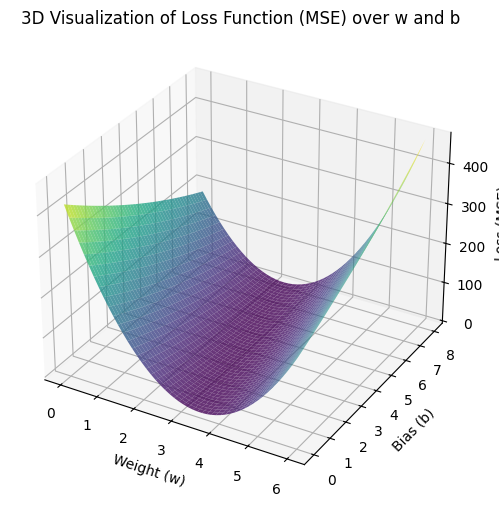

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data generation
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 3 * x + 4 + np.random.normal(0, 2, size=x.shape)  # True relationship with some noise

# Weight and bias ranges
w = np.linspace(0, 6, 50)
b = np.linspace(0, 8, 50)
W, B = np.meshgrid(w, b)

# Loss function calculation (MSE)
L = np.zeros_like(W)
for i in range(len(x)):
    L += (y[i] - (W * x[i] + B)) ** 2
L /= len(x)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.8)
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('3D Visualization of Loss Function (MSE) over w and b')
plt.show()


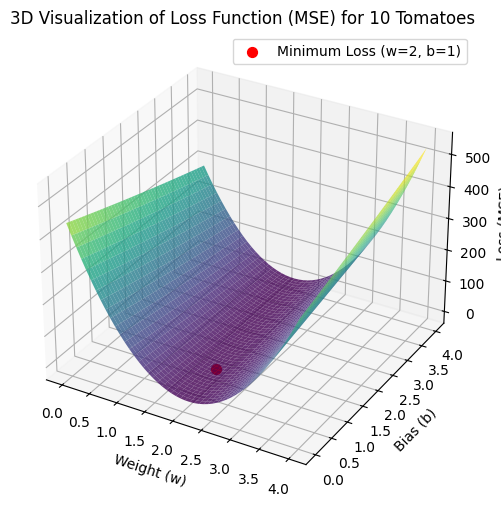

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data: Buying 10 tomatoes, actual cost is $21
x = 10
y = 21

# Weight and bias ranges
w = np.linspace(0, 4, 50)  # Searching around the true weight of 2
b = np.linspace(0, 4, 50)  # Searching around the true bias of 1
W, B = np.meshgrid(w, b)

# Loss function calculation (MSE)
L = (y - (W * x + B)) ** 2

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.8)

# Mark the minimum point
min_w, min_b = 2, 1
min_loss = (y - (min_w * x + min_b)) ** 2
ax.scatter(min_w, min_b, min_loss, color='red', label='Minimum Loss (w=2, b=1)', s=50)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('3D Visualization of Loss Function (MSE) for 10 Tomatoes')
ax.legend()
plt.show()


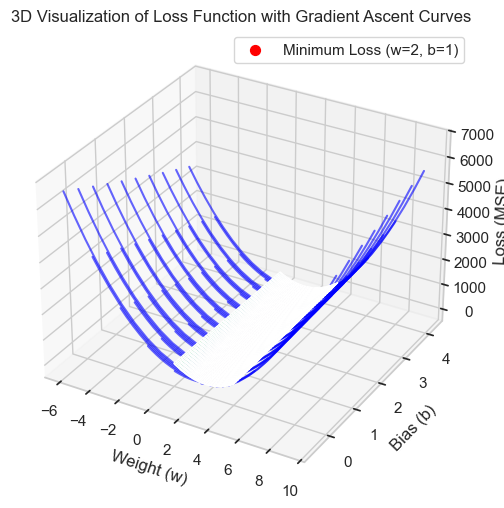

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data: Buying 10 tomatoes, actual cost is $21
x = 10
y = 21

# Weight and bias ranges
w = np.linspace(0, 4, 50)  # Searching around the true weight of 2
b = np.linspace(0, 4, 50)  # Searching around the true bias of 1
W, B = np.meshgrid(w, b)

# Loss function calculation (MSE)
L = (y - (W * x + B)) ** 2

# Compute gradients (partial derivatives)
dL_dw = -2 * x * (y - (W * x + B))
dL_db = -2 * (y - (W * x + B))

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.8)

# Mark the minimum point
min_w, min_b = 2, 1
min_loss = (y - (min_w * x + min_b)) ** 2
ax.scatter(min_w, min_b, min_loss, color='red', label='Minimum Loss (w=2, b=1)', s=50)

# Add gradient ascent arrows with shorter length
for i in range(0, 50, 5):
    for j in range(0, 50, 5):
        # Starting point for arrows
        start_w, start_b = W[i, j], B[i, j]
        start_L = L[i, j]
        
        # Direction for the arrows (gradient ascent) - reduce scale for shorter arrows
        grad_w = dL_dw[i, j] * 0.02
        grad_b = dL_db[i, j] * 0.02

        # Create curved effect with reduced length
        curve_t = np.linspace(0, 0.5, 10)  # Shorter segment for better visibility
        curve_w = start_w + grad_w * np.sin(curve_t * np.pi / 2)
        curve_b = start_b + grad_b * np.sin(curve_t * np.pi / 2)
        curve_L = (y - (curve_w * x + curve_b)) ** 2

        ax.plot(curve_w, curve_b, curve_L, color='blue', alpha=0.6)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('3D Visualization of Loss Function with Gradient Ascent Curves')
ax.legend()
plt.show()


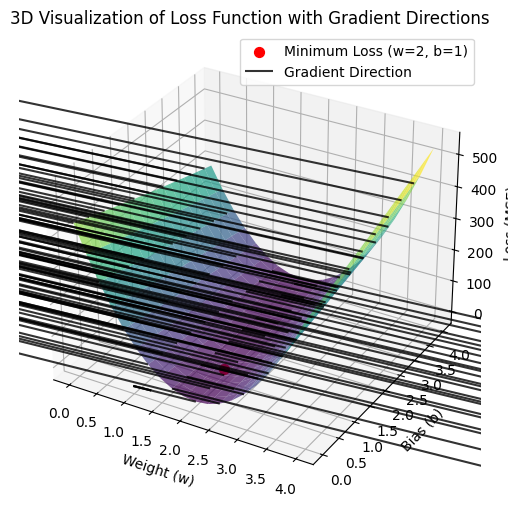

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data: Buying 10 tomatoes, actual cost is $21
x = 10
y = 21

# Weight and bias ranges
w = np.linspace(0, 4, 20)  # Fewer points for better gradient visualization
b = np.linspace(0, 4, 20)
W, B = np.meshgrid(w, b)

# Loss function calculation (MSE)
L = (y - (W * x + B)) ** 2

# Compute gradients (partial derivatives)
grad_w = -2 * x * (y - (W * x + B))
grad_b = -2 * (y - (W * x + B))

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.7)

# Marking the minimum point
min_w, min_b = 2, 1
min_loss = (y - (min_w * x + min_b)) ** 2
ax.scatter(min_w, min_b, min_loss, color='red', label='Minimum Loss (w=2, b=1)', s=50)

# Plotting gradient vectors
step = 2  # Control the density of vectors
ax.quiver(W[::step, ::step], B[::step, ::step], L[::step, ::step], 
          -grad_w[::step, ::step], -grad_b[::step, ::step], np.zeros_like(grad_w[::step, ::step]),
          color='black', alpha=0.8, label='Gradient Direction')

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('3D Visualization of Loss Function with Gradient Directions')
ax.legend()
plt.show()


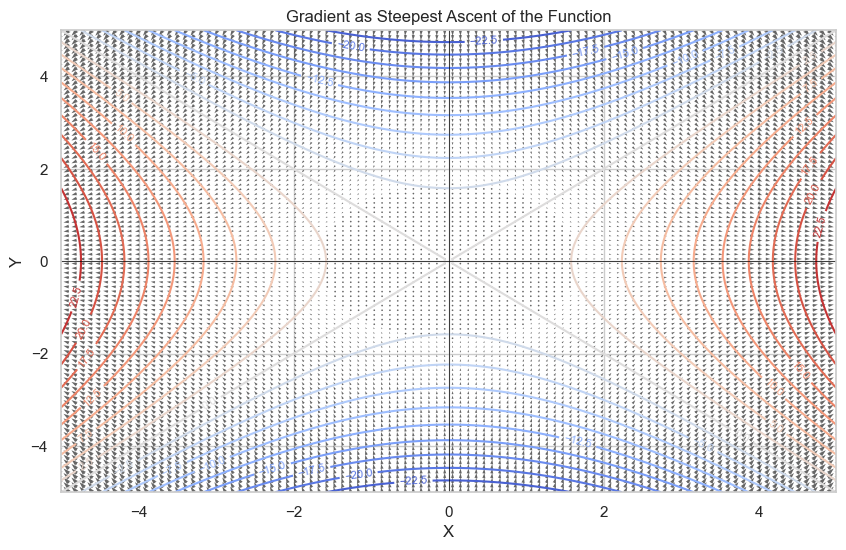

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function
def f(x, y):
    return x**2 - y**2  # Example: A hyperbolic paraboloid

# Compute the gradient of the function
def gradient(x, y):
    df_dx = 2 * x
    df_dy = -2 * y
    return df_dx, df_dy

# Create a meshgrid for plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Calculate the gradient vectors
U, V = gradient(X, Y)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Contour plot of the function
contour = plt.contour(X, Y, Z, levels=20, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)

# Quiver plot for gradient vectors (steepest ascent)
plt.quiver(X, Y, U, V, color='black', alpha=0.6)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient as Steepest Ascent of the Function')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.show()


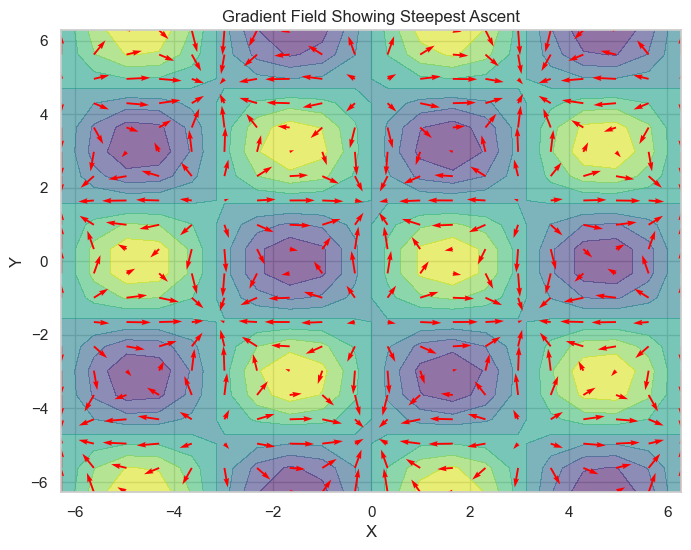

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y)
def f(x, y):
    return np.sin(x) * np.cos(y)

# Create a grid of x and y values
x = np.linspace(-2 * np.pi, 2 * np.pi, 20)
y = np.linspace(-2 * np.pi, 2 * np.pi, 20)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z = f(X, Y)

# Compute the gradients (partial derivatives)
df_dx, df_dy = np.gradient(Z, x[1] - x[0], y[1] - y[0])

# Plot the function and its gradients
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis', alpha=0.6)
plt.quiver(X, Y, df_dx, df_dy, color='red', angles='xy')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Field Showing Steepest Ascent')
plt.grid(True)
plt.show()


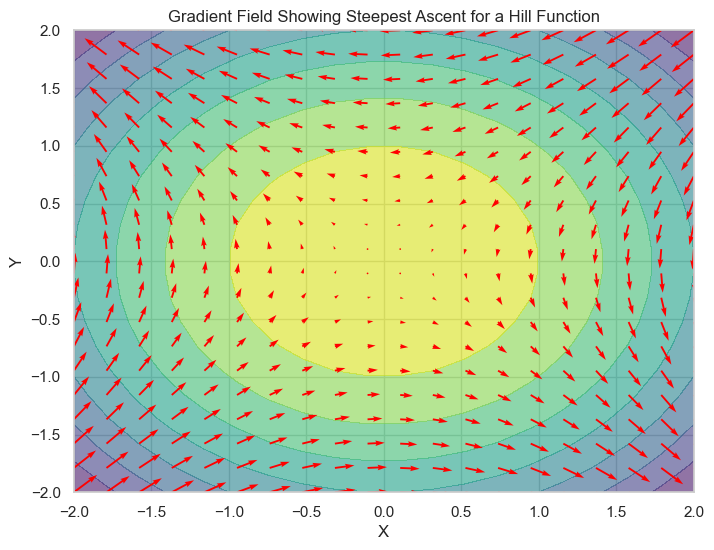

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hill function
def hill(x, y):
    return -(x**2 + y**2)

# Create a grid of x and y values
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z = hill(X, Y)

# Compute the gradients (partial derivatives)
df_dx, df_dy = np.gradient(Z, x[1] - x[0], y[1] - y[0])

# Plot the function and its gradients
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis', alpha=0.6)
plt.quiver(X, Y, df_dx, df_dy, color='red', angles='xy')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Field Showing Steepest Ascent for a Hill Function')
plt.grid(True)
plt.show()


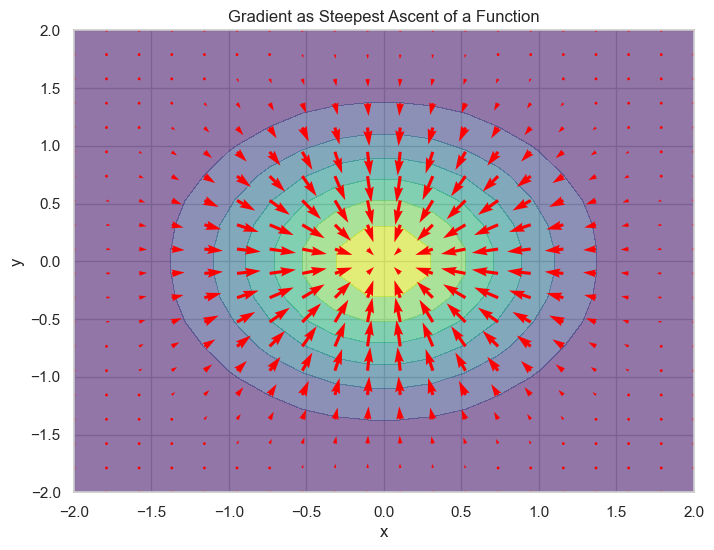

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hill function (2D Gaussian)
def hill_function(x, y):
    return np.exp(-(x**2 + y**2))

# Compute the gradient of the hill function
def gradient_hill(x, y):
    df_dx = -2 * x * np.exp(-(x**2 + y**2))
    df_dy = -2 * y * np.exp(-(x**2 + y**2))
    return df_dx, df_dy

# Create a grid of points
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = hill_function(X, Y)

# Compute the gradient at each point
df_dx, df_dy = gradient_hill(X, Y)

# Plot the hill function using a contour plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap="viridis", alpha=0.6)

# Plot the gradient vectors (red arrows)
plt.quiver(X, Y, df_dx, df_dy, color='red', scale=20, width=0.005)

# Add labels and title
plt.title("Gradient as Steepest Ascent of a Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

# Show the plot
plt.savefig("steepest_ascent.png", transparent=True)
plt.show()

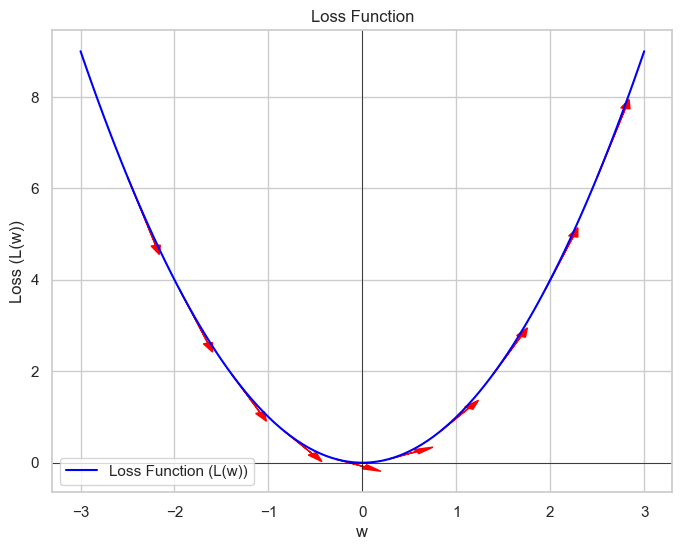

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function and its gradient
def loss_function(w):
    return w**2

def gradient_loss(w):
    return 2 * w

# Generate w values
w = np.linspace(-3, 3, 100)
L = loss_function(w)

# Compute gradients at sample points
w_samples = np.linspace(-2.5, 2.5, 10)
L_samples = loss_function(w_samples)
gradients = gradient_loss(w_samples)

# Plot the loss function
plt.figure(figsize=(8, 6))
plt.plot(w, L, label='Loss Function (L(w))', color='blue')

# Plot gradient arrows (red)
for i in range(len(w_samples)):
    plt.arrow(w_samples[i], L_samples[i], 0.3, gradients[i] * 0.3, 
              color='red', head_width=0.1, head_length=0.2)

plt.xlabel("w")
plt.ylabel("Loss (L(w))")
plt.title("Loss Function")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.savefig("gradient_1d.png", transparent=True)
plt.show()
